In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model parameters
sigma = 1.0
kappa = 0.1
varphi = 1.5
rho_a = 0.8
phi_pi = 1.5
beta = 0.99
gamma = 0.5

In [22]:
# Denominator common to all equations
denominator = ((1 - rho_a) * (1 - beta * rho_a) - sigma * kappa * (rho_a - phi_pi)) * (gamma + varphi)

# Functions to compute responses
def y_hat(a_t):
    return - (sigma * kappa * (1 + varphi) * (rho_a - phi_pi) / denominator) * a_t

def pi_hat(a_t):
    return - (kappa * (1 + varphi) * (1 - rho_a) / denominator) * a_t

def i_hat(a_t):
    return phi_pi * (-kappa * (1 + varphi) * (1 - rho_a) / denominator) * a_t

def y_flex(a_t):
    return (1+varphi) / (gamma + varphi) * a_t

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


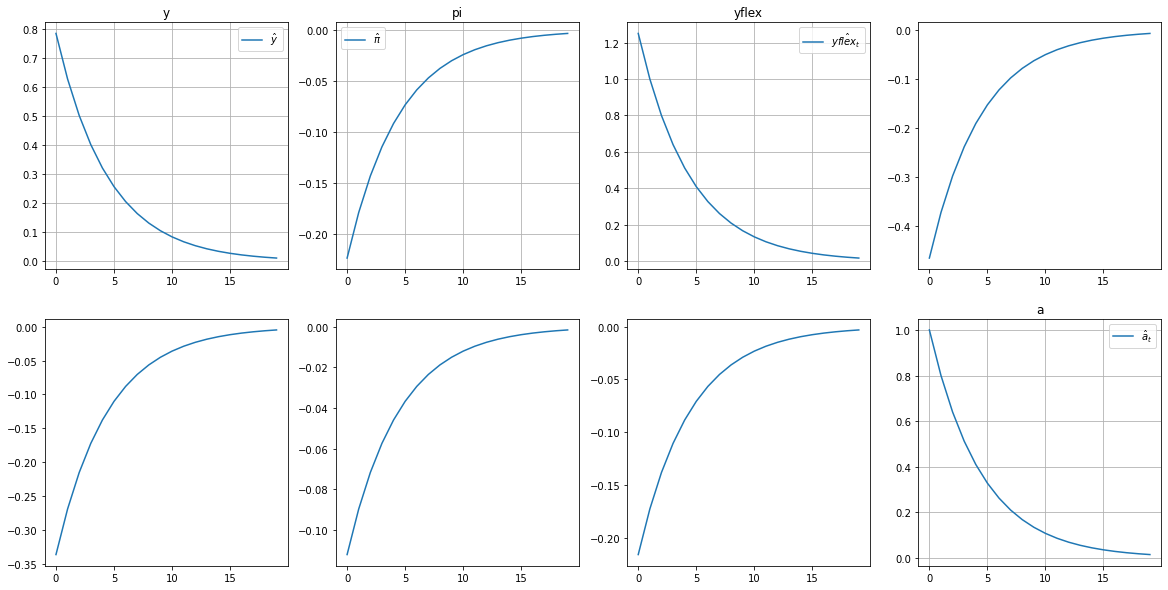

In [27]:


# Time horizon and initial conditions
T = 20
a_t = np.zeros(T)
epsilon_t = np.zeros(T)
epsilon_t[0] = 1  # Impulse at t=0

# Generate the autoregressive process for a_t
for t in range(0, T):
    a_t[t] = rho_a * a_t[t-1] + epsilon_t[t]

# Compute responses
y = y_hat(a_t)
yflex = y_flex(a_t)
y_gap = y - yflex
pi = pi_hat(a_t)
i = i_hat(a_t)
r = i - pi
n = y - a_t

# Plotting
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

ax[0,0].plot(y, label=r'$\hat{y}$')
ax[0,0].set_title('y')
ax[0,0].legend()
ax[0,0].grid(True)

ax[0,1].plot(pi, label=r'$\hat{\pi}$')
ax[0,1].set_title('pi')
ax[0,1].legend()
ax[0,1].grid(True)

ax[0,2].plot(yflex, label=r'$\hat{yflex}_t$')
ax[0,2].set_title('yflex')
ax[0,2].legend()
ax[0,2].grid(True)

ax[0,3].plot(y_gap, label=r'$\hat{y}_{\text{gap}}$')
ax[0,3].set_title('y_gap')
ax[0,3].legend()
ax[0,3].grid(True)


ax[1,0].plot(i, label=r'$\hat{i}_t$')
ax[1,0].set_title('i')
ax[1,0].legend()
ax[1,0].grid(True)

ax[1,1].plot(r, label=r'$\hat{r}_t$')
ax[1,1].set_title('r')
ax[1,1].legend()
ax[1,1].grid(True)

ax[1,2].plot(n, label=r'$\hat{n}_t$')
ax[1,2].set_title('n')
ax[1,2].legend()
ax[1,2].grid(True)

ax[1,3].plot(a_t, label=r'$\hat{a}_t$')
ax[1,3].set_title('a')
ax[1,3].legend()
ax[1,3].grid(True)


plt.show()

In [17]:
ax[0]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)